# Financial Resilience Challenge

This challenge asks you to **build a machine learning model to predict which individuals across Africa and around the world are most likely to be financially resilient or not.**

This solution will provide insight into people’s financial behaviors and resilience, which can help financial services providers including insurance companies and banks tailor their services to give their clients the best chance possible to achieve financial resilience.

In [273]:
import pandas as pd 
import pickle
import matplotlib.pyplot as plt  
import math
import numpy as np 
import os
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb


from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score


In [274]:
train_data = pd.read_csv(r'C:\Users\MATILYA\Documents\Self\Zindi\Comp\Financial Resilience Challenge\Data\Train.csv')
test_data = pd.read_csv(r'C:\Users\MATILYA\Documents\Self\Zindi\Comp\Financial Resilience Challenge\Data\test.csv')

In [351]:
data =train_data.append(test_data)

C:\Users\MATILYA\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149810 entries, 0 to 44942
Data columns (total 36 columns):
ID             149810 non-null object
Q1             149810 non-null int64
Q10a           149810 non-null int64
Q10b           149810 non-null int64
Q11            149810 non-null int64
Q12            149810 non-null int64
Q13a           149810 non-null int64
Q14            149810 non-null int64
Q15            149810 non-null int64
Q16            149810 non-null int64
Q17a           149810 non-null int64
Q17b           149810 non-null int64
Q19            115206 non-null float64
Q2             68137 non-null float64
Q20            115206 non-null float64
Q21            149810 non-null int64
Q22            149810 non-null int64
Q23            53580 non-null float64
Q24            149810 non-null int64
Q25            149810 non-null int64
Q26            115206 non-null float64
Q27            83535 non-null float64
Q28            105372 non-null float64
Q3             64562 non-nu

### Data Description 
This weill explain the Q section 

**Value 1 - Yes, 2 - No, 3-Don't Know , 4 - refused to answer**

Q1	Has ATM/debit card

Q2	Is the ATM connect to an account with your name?

Q3	Purchased with the ATM

Q4	Use of mobile or internet to make payments or send money

Q5	Mobile/internet to check account balance

Q6	Has a credit card

Q7	Used the credit card in 12 months

Q8	Money deposits to a bank account in the last 12 

Q9	Money withdrawals from a bank account in the last 12 months

Q10a	Used the Internet in the last 12 months;- to make payments for the bills -

Q10b	Used the Internet in the last 12 months;- to buy something 

Q11	Savings in the last 12 months to start a business/farm

Q12	Savings in the last 12 months for old age

Q13a	Saved the money at a bank/financial institutions

Q13b	Save the money at groups/clubs of any informal type

Q14	Has a loan from formal financial institutions to purchase land, home, or apartment

Q15	Borrowed money for health/medical purposes in the last 12 months

Q16	Borrowed money to start/grow business or farm

Q17a	Borrowed money from formal financial institutions - 12 months

Q17b	Borrowed money from friends, relatives, or family - 12 months

Q19	Sent/given money to friend/relative

Q20	Received money from friend or relative

Q21	Payments for electricity, water, or trash in the last 12 months

Q22	salary/wages in the last 12 months

Q23	Employed by government or public sector -12 months

Q24	Received any form of financial support from the government

Q25	Pension in the last 12 months

Q26	Received money for the sale of livestock, agricultural products, crops, produce? (12 months)

Q27	Received money from your business in last 12 months

owns_mobile: 	Owns a mobile phone

Q28	Has national ID card

target	target class

### Data pre-processing 

#### Region missing values 

From some excel analysis I have noted an issue with Nan in region 

In [4]:
missing_data = data['region'].isnull()

In [5]:
country_check = data[missing_data]
country_check['country'].value_counts()

Taiwan, China    980
Name: country, dtype: int64

All the Nan in the reion feild represents Taiwan, China. I am not sure if this was done by mistake or not.

From a Google search this region can be classifed in East Asia.

In [352]:
data['region'] = data['region'].fillna('East Asia')

#### Age  missing values 
There are some missing age values and from my analysis I cannot find a reason for this from the data. It could not have been asked at the point where this data was collected. To mitigae this, the median value will replace the missing values in this feild. 

In [353]:
median_age = data['age'].median()

In [354]:
data['age'] = data['age'].fillna(median_age)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149810 entries, 0 to 44942
Data columns (total 36 columns):
ID             149810 non-null object
Q1             149810 non-null int64
Q10a           149810 non-null int64
Q10b           149810 non-null int64
Q11            149810 non-null int64
Q12            149810 non-null int64
Q13a           149810 non-null int64
Q14            149810 non-null int64
Q15            149810 non-null int64
Q16            149810 non-null int64
Q17a           149810 non-null int64
Q17b           149810 non-null int64
Q19            115206 non-null float64
Q2             68137 non-null float64
Q20            115206 non-null float64
Q21            149810 non-null int64
Q22            149810 non-null int64
Q23            53580 non-null float64
Q24            149810 non-null int64
Q25            149810 non-null int64
Q26            115206 non-null float64
Q27            83535 non-null float64
Q28            105372 non-null float64
Q3             64562 non-nu

#### owns_mobile  missing values 
There are 2 values missing  for this feild. From my analysis, there is nothing that distingushes theses 2 feilds. I will assume that this data was just not entered by mistake. I will remove these 2 feilds 

In [9]:
check_ix = data['owns_mobile'].isnull()
check = data[check_ix]
check

,ID,Q1,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,...,Q6,Q7,Q8,Q9,age,country,owns_mobile,population,region,target
66326,ID_6334384042,1,1,2,2,1,1,1,2,2,...,1,1.0,1.0,1.0,57.0,Cyprus,NaN,972712.0,High income: nonOECD,1.0
37248,ID_8302637991,1,1,2,2,2,2,1,2,2,...,2,NaN,2.0,1.0,42.0,"Iran, Islamic Rep.",NaN,61272712.0,Middle East & North Africa (excluding high inc...,NaN


In [10]:
check.index

Int64Index([66326, 37248], dtype='int64')

In [11]:
data = data.drop([66326, 37248], axis=0)

So to convinently remove all the other null values I will fill the Target value with data to make sure nothing is remved

In [12]:
data['target'] = data['target'].fillna('Test')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149807 entries, 0 to 44942
Data columns (total 36 columns):
ID             149807 non-null object
Q1             149807 non-null int64
Q10a           149807 non-null int64
Q10b           149807 non-null int64
Q11            149807 non-null int64
Q12            149807 non-null int64
Q13a           149807 non-null int64
Q14            149807 non-null int64
Q15            149807 non-null int64
Q16            149807 non-null int64
Q17a           149807 non-null int64
Q17b           149807 non-null int64
Q19            115205 non-null float64
Q2             68135 non-null float64
Q20            115205 non-null float64
Q21            149807 non-null int64
Q22            149807 non-null int64
Q23            53579 non-null float64
Q24            149807 non-null int64
Q25            149807 non-null int64
Q26            115205 non-null float64
Q27            83533 non-null float64
Q28            105371 non-null float64
Q3             64560 non-nu

I will now place 0 in the place of NaN 

In [355]:
data = data.fillna(0)

In [102]:
data.head()

,ID,Q1,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,...,Q6,Q7,Q8,Q9,age,country,owns_mobile,population,region,target
0,ID_0000020532,2,2,2,2,2,2,2,1,2,...,2,0.0,0.0,0.0,66.0,Morocco,1.0,25550170.0,Middle East & North Africa (excluding high inc...,0
1,ID_0000075765,2,2,2,2,2,1,2,2,2,...,2,0.0,1.0,1.0,44.0,Lebanon,1.0,4591023.0,Middle East & North Africa (excluding high inc...,1
2,ID_0000085491,1,2,2,2,2,2,2,2,2,...,2,0.0,1.0,1.0,29.0,Morocco,1.0,25550170.0,Middle East & North Africa (excluding high inc...,0
3,ID_0000144505,1,1,1,2,1,1,2,2,2,...,2,0.0,1.0,1.0,44.0,Canada,1.0,30491168.0,High income: OECD,1
4,ID_0000214184,2,1,2,2,2,2,2,2,2,...,2,0.0,0.0,0.0,36.0,Mexico,1.0,93002320.0,Latin America & Caribbean (excluding high income),1


In [103]:
data.to_csv('filled_data.csv')

## Model data processing 

I will one-hot and code country and region 

In [356]:
region = data[['region']]
region = pd.get_dummies(region, drop_first = True)

In [357]:
country = data[['country']]
country = pd.get_dummies(country, drop_first = True)

In [358]:
full_data = pd.concat([data,region,country], axis =1)

In [359]:
full_data.drop(['region','country'], axis =1, inplace = True)

In [18]:
full_data.to_csv('Model.csv')

KeyboardInterrupt: 

## Model creation 

In [24]:
full_data = pd.read_csv('Model.csv')

In [360]:
full_data.drop(['ID'], axis =1, inplace = True)

In [361]:
data_train = full_data[:104867]

In [362]:
data_test = full_data[-44943:]

In [363]:
train_check = data_train

In [366]:
train_check.drop(['target'], axis =1, inplace = True)

C:\Users\MATILYA\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [367]:
col = list(train_check.columns)

In [368]:
X = train_check.loc[:,col]
#y = data_train[['target']]

In [279]:
X.to_csv('Unscaled_X.csv')

In [41]:
X = pd.read_csv('Unscaled_X.csv')

In [37]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104865 entries, 0 to 104866
Data columns (total 1 columns):
target    104865 non-null object
dtypes: object(1)
memory usage: 1.6+ MB


In [365]:
y = y['target'].astype(str).astype(float)

In [39]:
y.to_csv('Unscaled_y.csv')

C:\Users\MATILYA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [7]:
X = pd.read_csv('Og_X.csv')
y = pd.read_csv('Og_y.csv')

### Model creation 

In [369]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

In [320]:
#Apply Random forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

y_train_rf_pred = rf_model.predict_proba(X_train)# keep probabilities for the positive outcome only
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, y_train_rf_pred[:,1]))) #This is the compares y_train to the second column i.e. where it redicted 1
#So if I do  ytrain_pred[:,0], the output is (1-ytrain_pred[:,1] )

ytest_rf_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_rf_pred[:,1])))


C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF train roc-auc: 0.9950581074073298
RF test roc-auc: 0.7444373818732132


In [370]:
#xgb_model
xgb_model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=500,n_jobs=-1)
xgb_model.fit(X_train, y_train)

ytrain_pred_xg = xgb_model.predict_proba(X_train)
print('XG train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_xg[:,1]))) 

ytest_pred_xg = xgb_model.predict_proba(X_test)
print('XG test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_xg[:,1])))

C:\Users\MATILYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG train roc-auc: 0.8530339015000471
XG test roc-auc: 0.7978783998058424


In [254]:
#LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)

ytrain_pred_log = log_classifier.predict_proba(X_train)
print('Logistic Regression train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_log[:,1]))) 

ytest_pred_log = log_classifier.predict_proba(X_test)
print('Logistic Regression test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_log[:,1])))

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression train roc-auc: 0.4783743218987292
Logistic Regression test roc-auc: 0.484559017068277


In [255]:
#KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

ytrain_pred_knn = knn_classifier.predict_proba(X_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_knn[:,1]))) 

ytest_pred_knn = knn_classifier.predict_proba(X_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_knn[:,1])))

KNN train roc-auc: 0.85670275386852
KNN test roc-auc: 0.7158589769771314


In [256]:
#AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)

ytrain_pred_ada = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_ada[:,1])))

ytest_pred_ada = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_ada[:,1])))

Adaboost train roc-auc: 0.7770109370637371
Adaboost test roc-auc: 0.7755365973664629


In [ ]:
#SVMlassifier
svm_classifier=SVC()
svm_classifier.fit(X_train, y_train)

ytrain_pred_svm = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_svm[:,1])))

ytest_pred_svm = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_svm[:,1])))

C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
#xg_boost most accurate test scores 

### Hyperparameter tunung


In [46]:
params = { 'min_child_weight': [i for i in np.arange(1,15,1)],
          'gamma': [i for i in np.arange(0,6,0.5)],
          'subsample': [i for i in np.arange(0,1.1,0.1)],
          'colsample_bytree': [i for i in np.arange(0,1.1,0.1)],
          'max_depth': [i for i in np.arange(1,15,1)],
          'scale_pos_weight':[i for i in np.arange(1,15,1)],
          'learning_rate': [i for i in np.arange(0,0.15,0.01)],
          'n_estimators' : [i for i in np.arange(0,2000,100)] }

In [47]:
xg = xgb.XGBClassifier(objective='binary:logistic', silent=True, nthread=1) 
#silent - Whether print messages during construction
#nthread - Number of threads to use for loading data when parallelization is applicable.

In [48]:
xg_random = RandomizedSearchCV(xg, param_distributions=params, n_iter=1, scoring= "roc_auc", n_jobs=4, cv=10, verbose=1)
#Randomized search on hyper parameters

In [49]:
xg_random.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 28.5min finished
C:\Users\MATILYA\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MATILYA\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was pass

[12:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:01:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_c...
                                        'n_estimators': [0, 100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000,

In [50]:
xg_random.best_params_

{'subsample': 0.9,
 'scale_pos_weight': 7,
 'n_estimators': 1200,
 'min_child_weight': 11,
 'max_depth': 5,
 'learning_rate': 0.03,
 'gamma': 5.5,
 'colsample_bytree': 0.4}

In [56]:
#xgb_model
xgb_model = xgb.XGBClassifier(subsample = 0.9,scale_pos_weight = 7, n_estimators = 1200, min_child_weight= 11,
                             max_depth =  5,learning_rate = 0.03, gamma = 5.5,colsample_bytree =  0.4 )
xgb_model.fit(X_train, y_train)

ytrain_pred_xg = xgb_model.predict_proba(X_train)
print('XG train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred_xg[:,1]))) 

ytest_pred_xg = xgb_model.predict_proba(X_test)
print('XG test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred_xg[:,1])))

[12:14:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XG train roc-auc: 0.8187486960490009


ValueError: Found input variables with inconsistent numbers of samples: [20925, 44942]

In [51]:
ytest_xg_random = xg_random.predict_proba(X_test)
print('Optimized test roc-auc: {}'.format(roc_auc_score(y_test, ytest_xg_random[:,1])))

ValueError: Found input variables with inconsistent numbers of samples: [20925, 44942]

### Grid search 

In [22]:
grid_xg_random = GridSearchCV(estimator = xg, param_grid=params, scoring= "roc_auc", cv=5, verbose=1, n_jobs = 1)
#Randomized search on hyper parameters
grid_xg_random.fit(X_train,y_train)

MemoryError: 

In [297]:
grid_xg_random.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

### Feature importance 

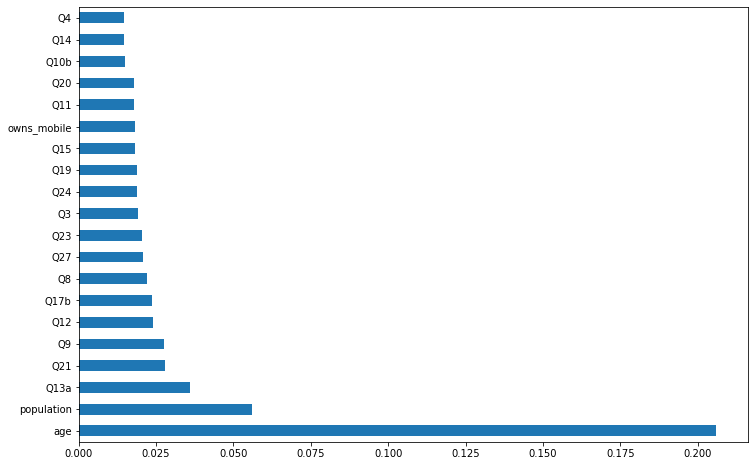

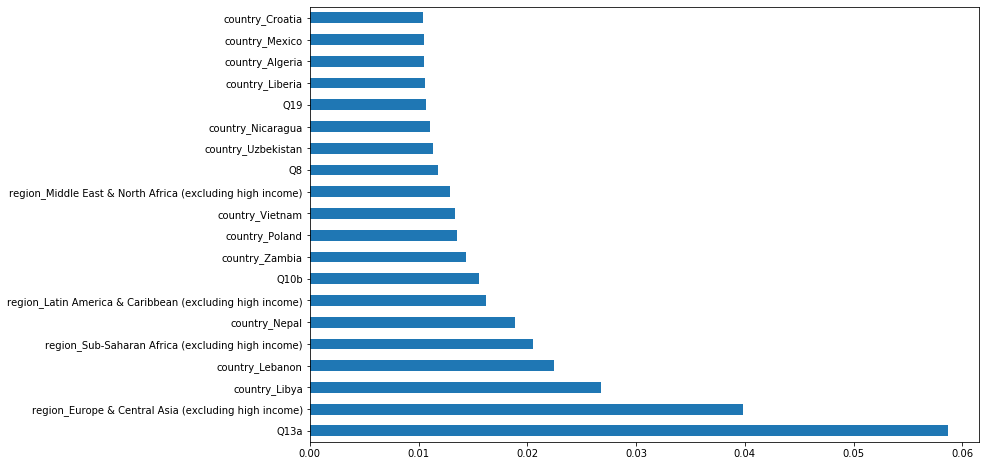

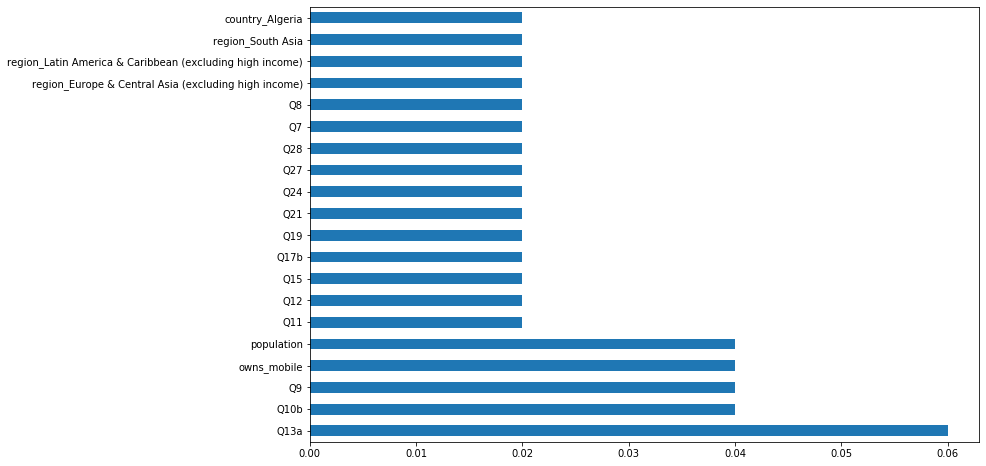

In [258]:
#Feature importance 
for model in [rf_model,xgb_model,ada_classifier]:
    plt.figure(figsize = (12,8))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(20).plot(kind='barh')
    plt.show()

From 2 of the most accurate models, 13a was the most important feature.
population was also a key factor 
- Q13a	Saved the money at a bank/financial institutions


## ROC curve 

In [270]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

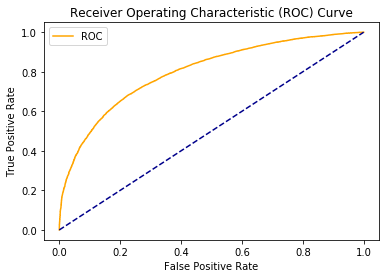

In [271]:
#Roc curve
fpr_xg, tpr_xg, thresholds = roc_curve(y_test, ytest_pred_xg[:,1])
plot_roc_curve(fpr_xg, tpr_xg)

In [290]:
#This os stuff creates folders on the pc 
filename = 'xgb_model_optimized.sav'
pickle.dump(xg_random, open(filename, 'wb'))

In [23]:
filename = 'xgb_model_optimized.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [371]:
data_test = full_data[-44943:]

In [372]:
test_check = data_test

In [373]:
test_check.drop(['target'], axis =1, inplace = True)
col = list(test_check.columns)
X_pred = test_check.loc[:,col]

C:\Users\MATILYA\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [374]:
fin_predictions = xgb_model.predict(X_pred)

In [375]:
fin_predictions = pd.DataFrame(fin_predictions)

In [58]:
fin_predictions.to_csv('Trail_predictions.csv')

In [314]:
fin_pred = xgb_model.predict(X_pred)

In [315]:
fin_predictions.shape

(44942, 1)

In [376]:
sample_pred = pd.read_csv('SampleSubmission (1).csv')

In [317]:
sample.shape

(44943, 2)

In [377]:
sample = sample_pred

In [304]:
print(fin_predictions.shape)
print(sample.shape)

(44942, 1)
(44943, 2)


In [378]:
sample['target'] = fin_predictions
sample

,ID,target
0,ID_0000005111,1.0
1,ID_0000389416,0.0
2,ID_0000634789,1.0
3,ID_0000778100,1.0
4,ID_0001123210,1.0
...,...,...
44938,ID_9998436223,1.0
44939,ID_9998690942,1.0
44940,ID_9999258746,1.0
44941,ID_9999427887,0.0


In [380]:
sample.to_csv('Norbert Matilya.csv')